In [6]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [8]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/creditcard.csv

--2020-10-05 05:15:24--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/creditcard.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.142
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150828752 (144M) [application/vnd.ms-excel]
Saving to: ‘creditcard.csv.1’

creditcard.csv.1    100%[===================>] 143.84M  12.0MB/s    in 14s     

2020-10-05 05:15:39 (10.5 MB/s) - ‘creditcard.csv.1’ saved [150828752/150828752]



In [9]:
!pip install pycaret

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [11]:
dataset = pd.read_csv('creditcard.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 30].values

In [11]:
from pycaret.classification import *
clf1 = setup(data = dataset, target = 'Class')

Setup Succesfully Completed!


,Description,Value
0,session_id,7767
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9995,0.9587,0.7700,0.9378,0.8429,0.8426,0.8481,7.3739
1,CatBoost Classifier,0.9995,0.9639,0.7618,0.9444,0.8417,0.8415,0.8472,24.5532
2,Random Forest Classifier,0.9994,0.9186,0.7509,0.9177,0.8246,0.8244,0.8292,1.8976
3,Linear Discriminant Analysis,0.9993,0.9657,0.7227,0.8749,0.7892,0.7889,0.7937,0.2483
4,Extra Trees Classifier,0.9993,0.9218,0.6745,0.9278,0.7785,0.7781,0.7894,1.9582
5,Ada Boost Classifier,0.9992,0.9504,0.6736,0.8387,0.7447,0.7443,0.7500,11.9384
6,Decision Tree Classifier,0.9991,0.8607,0.7218,0.7486,0.7313,0.7308,0.7328,2.6558
7,Gradient Boosting Classifier,0.9990,0.8385,0.6609,0.7836,0.7071,0.7067,0.7141,62.3538
8,Logistic Regression,0.9989,0.8803,0.6645,0.6931,0.6736,0.6731,0.6756,0.8540
9,Ridge Classifier,0.9989,0.0000,0.4427,0.8867,0.5890,0.5885,0.6252,0.0441


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=7767,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

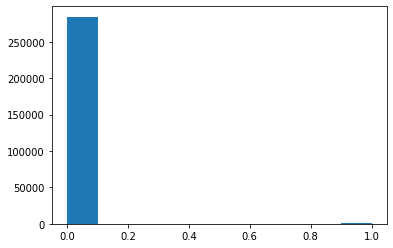

In [16]:
plt.hist(y);

In [17]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


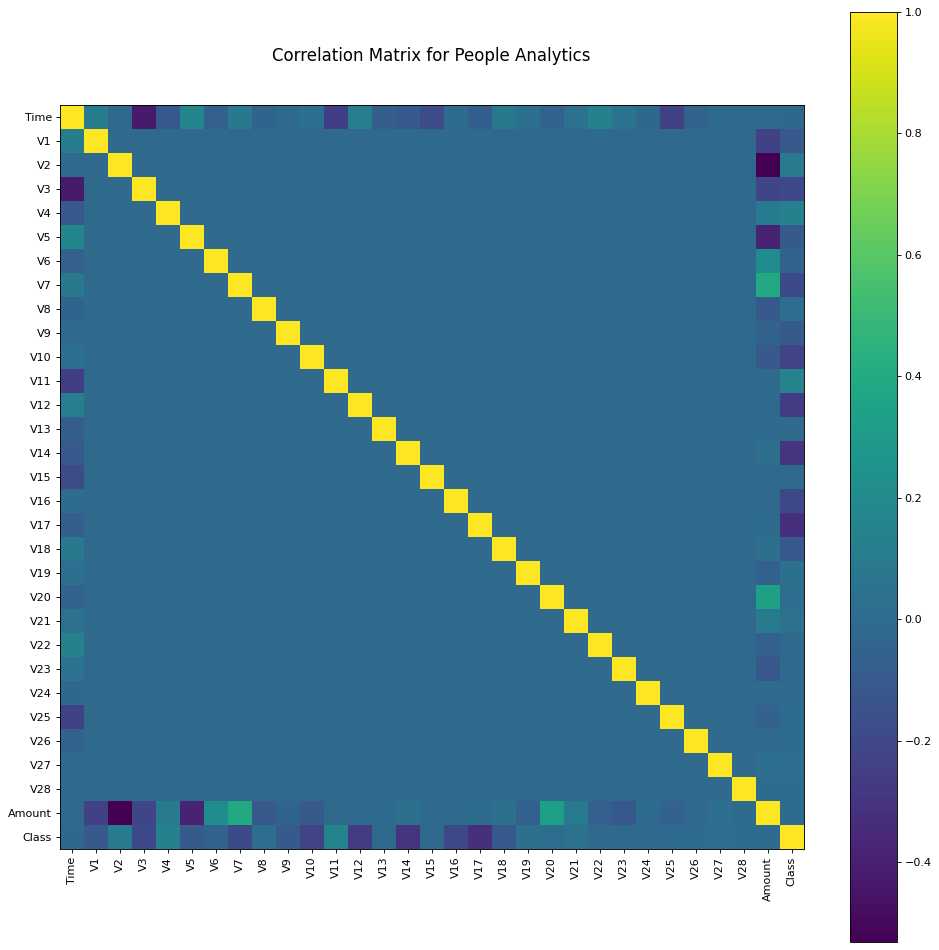

In [18]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'People Analytics'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    # print(df.columns)
    corr = df.corr()
    # print(corr)
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(dataset, 15)

In [19]:
def get_folds(X,y, k=5):
    return list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X, y))

In [20]:
folds = get_folds(X, y)
fold = folds[0]
X_train, X_test, y_train, y_test = X[fold[0]], X[fold[1]], y[fold[0]], y[fold[1]]

(array([227452.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    393.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

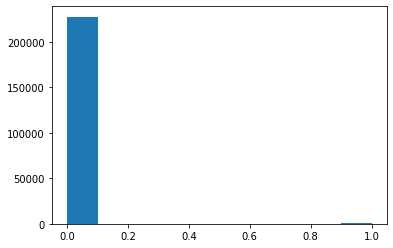

In [21]:
plt.hist(y_train)

## Imbalanced Dataset

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. 

**This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.**

We can use SMOTE as a data preparation method when fitting and evaluating machine learning algorithms in scikit-learn.

In [22]:
from imblearn.over_sampling import SMOTE

We can use the SMOTE implementation provided by the imbalanced-learn Python library in the SMOTE class.

The SMOTE class acts like a data transform object from scikit-learn in that it must be defined and configured, fit on a dataset, then applied to create a new transformed version of the dataset.

For example, we can define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

In [23]:
smote = SMOTE('minority')
X_train_sampled, y_train_sampled = smote.fit_sample(X_train, y_train)

In [24]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

(array([227452.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    393.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

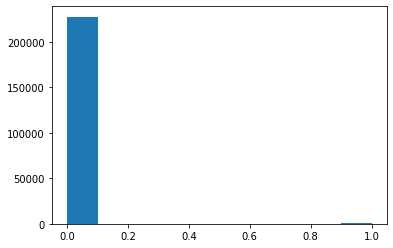

In [25]:
plt.hist(y_train)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
pd.Series(pca.explained_variance_ratio_)

0    0.999973
1    0.000027
dtype: float64

In [29]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

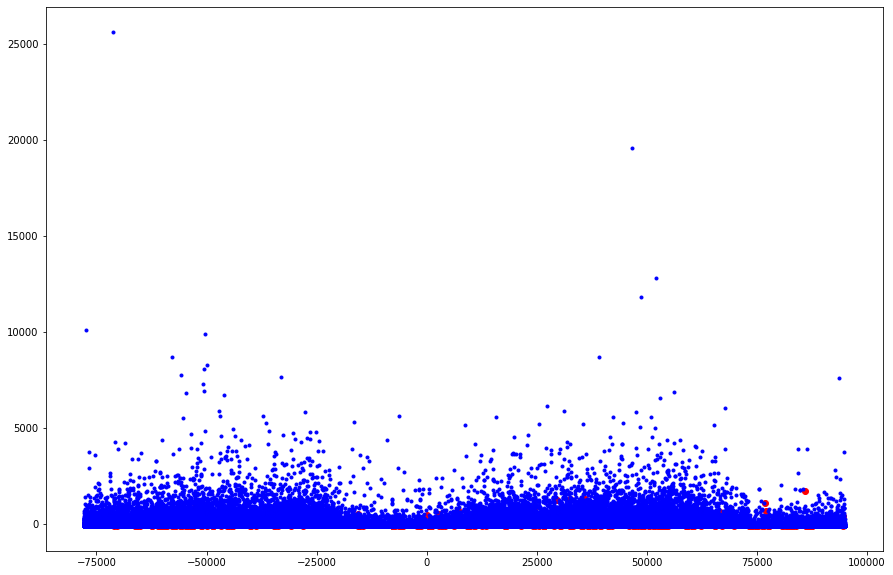

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(X_train_pca.iloc[np.where(y_train == 1)][0], X_train_pca.iloc[np.where(y_train == 1)][1], c = 'r', marker='o')
plt.scatter(X_train_pca.iloc[np.where(y_train == 0)][0], X_train_pca.iloc[np.where(y_train == 0)][1], c = 'b', marker='.')
plt.show()

### Voting Classifier

In [2]:
##Example
import numpy as np
import warnings
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
warnings.filterwarnings("ignore")

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [3]:
clf1 = LogisticRegression(random_state=667)
clf2 = RandomForestClassifier(random_state=667)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]


In [4]:
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                   voting = 'hard')

In [5]:
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                   voting = 'soft')

In [6]:
labels_new = ['Logistic Regression', 'Random Forest', 'Naive Bayes',
              'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

for (clf, label) in zip([clf1, clf2, clf3, voting_clf_hard,
                        voting_clf_soft], labels_new):
    scores = model_selection.cross_val_score(clf, X, y, cv=5,
            scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
    

### END EXAMPLE

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [Voting_Classifier_Hard]
Accuracy: 0.95 (+/- 0.03) [Voting_Classifier_Soft]


In [ ]:
from sklearn.utils import class_weight
weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
nlabels = len(np.unique(y_train))
weights_dict = { i: weights[i] for i in range(nlabels)}

In [ ]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf4 = GaussianNB()
clf5 = SVC(C=0.1, kernel='rbf',random_state=0, probability=True, class_weight=weights_dict)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3), ('gnb', clf4), ('svc', clf5)], voting='soft')

clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print (confusion_matrix(y_test, y_pred))

target_names = [0,1]
print(classification_report(y_test, y_pred, target_names))

cohen_kappa_score(y_test, y_pred)